In [1]:
using TSSM

In [2]:
push!(LOAD_PATH, pwd())
include("groundstate.jl")

groundstate! (generic function with 1 method)

In [3]:
V(x, y) = -2/sqrt(x^2+1)-2/sqrt(y^2+1)+1/sqrt((x-y)^2+1)

V (generic function with 1 method)

Potential shifted such that V_shifted>=0:

In [4]:
V_shifted(x, y) = V(x, y) + 3

V_shifted (generic function with 1 method)

Groundstate calculation can be done using only real numbers, we use the shifted potential and atomic units (hbar=1, mass=1):

In [5]:
m = SchroedingerReal2D(512, -15, 15, 512, -15, 15, potential=V_shifted, boundary_conditions=dirichlet, hbar=1, mass=1)

TSSM.SchroedingerReal2D{Float64}(Ptr{Void} @0x0000000002d946c0)

In [6]:
psi = wave_function(m)

TSSM.WfSchroedingerReal2D{Float64}(Ptr{Void} @0x0000000003367180,TSSM.SchroedingerReal2D{Float64}(Ptr{Void} @0x0000000002d946c0))

In [7]:
f(x,y)=exp(-x^2-y^2)
set!(psi, f)

In [8]:
groundstate!(psi, extrapolation_order=4, tol=1e-8, max_iters=1000, dt=1)

    0   1.408499308349472e+00   1.408499308349472e+00   1.000e+06   4.091e-01   2.918e+01      0.30   1.841112619059960e+00   1.000e+06   3.935e-01
changed step size, old:   1.000000000000000e+00  new:   5.000000000000000e-01
    1   1.408500400487399e+00   1.408500400487399e+00  -1.092e-06   4.091e-01   3.249e-01      0.49
    2   1.157509836740007e+00   1.157509836740007e+00   2.510e-01   3.735e-01   2.475e-01      0.64
    3   1.008848530011093e+00   1.008848530011093e+00   1.487e-01   3.410e-01   1.913e-01      0.77
    4   9.119114067305643e-01   9.119114067305643e-01   9.694e-02   3.063e-01   1.550e-01      0.91
    5   8.492116968325500e-01   8.492116968325500e-01   6.270e-02   2.606e-01   1.248e-01      1.04
    6   8.109395382020317e-01   8.109395382020317e-01   3.827e-02   2.099e-01   9.748e-02      1.18
    7   7.887919879254937e-01   7.887919879254937e-01   2.215e-02   1.623e-01   7.414e-02      1.31
    8   7.764241165213200e-01   7.764241165213200e-01   1.237e-02   1.224e

Consider unshifted potential:

In [9]:
set_potential!(m, V)

In [10]:
E = get_energy_expectation_deviation(psi)[1]

-2.2382578241083304

In [11]:
save(psi, "1dhelium_groundstate.hdf5")

In [12]:
using PyPlot

/home/hofi/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
x,y=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)

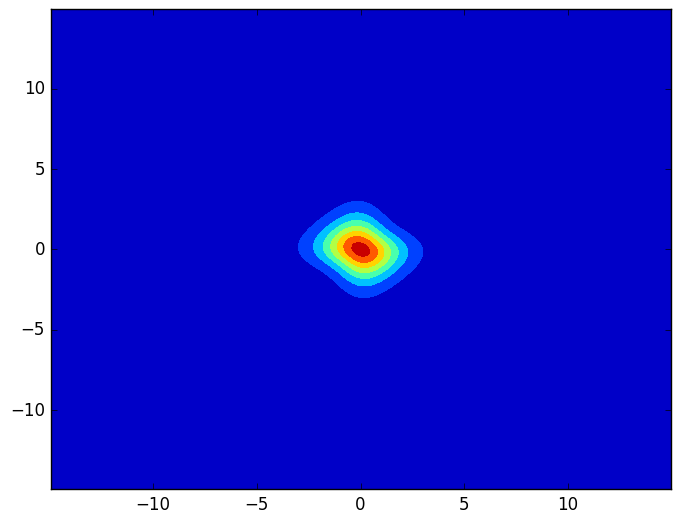

PyObject <matplotlib.contour.QuadContourSet object at 0x7f9ce73b0d50>

In [14]:
contourf(x,y,u)

In [15]:
m = Schroedinger2D(512, -15, 15, 512, -15, 15, potential=V, boundary_conditions=dirichlet, hbar=1, mass=1)

TSSM.Schroedinger2D{Float64}(Ptr{Void} @0x0000000007272eb0)

In [16]:
psi = wave_function(m)

TSSM.WfSchroedinger2D{Float64}(Ptr{Void} @0x0000000002d142c0,TSSM.Schroedinger2D{Float64}(Ptr{Void} @0x0000000007272eb0))

In [17]:
kick_duration = 0.01
kick_amplitude = 0.01

0.01

In [18]:
V_kick(x, y) = V(x, y) + 0.01*(x+y)

V_kick (generic function with 1 method)

In [19]:
include("time_stepper.jl")

local_orders (generic function with 5 methods)

In [64]:
load!(psi, "1dhelium_groundstate.hdf5")

In [65]:
E = potential_energy(psi)+kinetic_energy(psi)

-2.238257824108359

In [66]:
set_potential!(m, V_kick)

In [67]:
for t in equidistant_time_stepper(psi, 0, kick_duration, 0.01, Strang)
end

In [68]:
set_potential!(m, V)

In [69]:
E = potential_energy(psi)+kinetic_energy(psi)

-2.23825781410754

In [70]:
k = 0
out = zeros(200001)
for t in equidistant_time_stepper(psi, 0, 2000, 0.01, Strang)
    if mod(k,10)==0
        E_pot, E_int, x_mean, x_dev, y_mean, y_dev = get_realspace_observables(psi)
        out[k+1] = x_mean
        if mod(k,100)==0
            println(t,"\t", x_mean)
        end
    end    
    k += 1
end

0.01	-1.4999732652779356e-6
1.0100000000000007	-9.289355533315418e-5
2.010000000000001	-0.0001441766004818198
3.00999999999998	-0.0001435914093165207
4.009999999999959	-0.00010078732870920404
5.009999999999938	-3.4861354066534125e-5
6.009999999999916	3.385297066995915e-5
7.009999999999895	8.808131057048888e-5
8.009999999999874	0.00011599315305126665
9.009999999999852	0.0001128346358294785
10.009999999999831	8.139087308295816e-5
11.00999999999981	3.078791761709845e-5
12.009999999999788	-2.6008650752919378e-5
13.009999999999767	-7.487642880854676e-5
14.009999999999746	-0.00010431923116416419
15.009999999999724	-0.00010646893538673242
16.009999999999703	-8.183866271920852e-5
17.00999999999986	-3.542310652507633e-5
18.010000000000016	2.1307958768539144e-5
19.010000000000172	7.118774797416643e-5
20.01000000000033	0.00010315424507316784
21.010000000000485	0.00011071056370921891
22.01000000000064	8.76688842030584e-5
23.010000000000797	3.6774226399818866e-5
24.010000000000954	-2.47210662142483

Blackman-Harris window:

In [32]:
function omega(n; M=length(n))     
    0.35875-0.48829*cos(2*pi*n/(M-1))+0.14128*cos(4*pi*n/(M-1))-0.01168*cos(6*pi*n/(M-1))
end

omega (generic function with 1 method)

In [33]:
using PyPlot

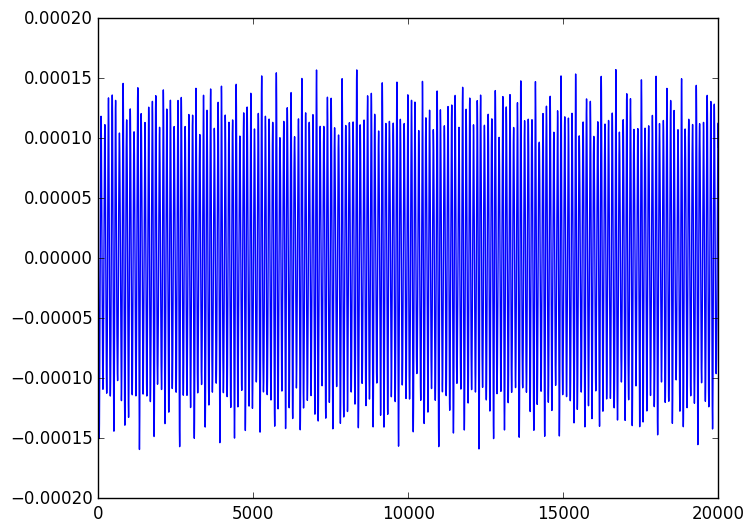

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ce6bf0210>

In [34]:
plot(out)

In [72]:
om=omega(collect(1:200001))

200001-element Array{Float64,1}:
 6.0e-5    
 6.00001e-5
 6.00001e-5
 6.00002e-5
 6.00003e-5
 6.00005e-5
 6.00007e-5
 6.00009e-5
 6.00011e-5
 6.00014e-5
 6.00017e-5
 6.0002e-5 
 6.00024e-5
 ⋮         
 6.00014e-5
 6.00011e-5
 6.00009e-5
 6.00007e-5
 6.00005e-5
 6.00003e-5
 6.00002e-5
 6.00001e-5
 6.00001e-5
 6.0e-5    
 6.0e-5    
 6.0e-5    

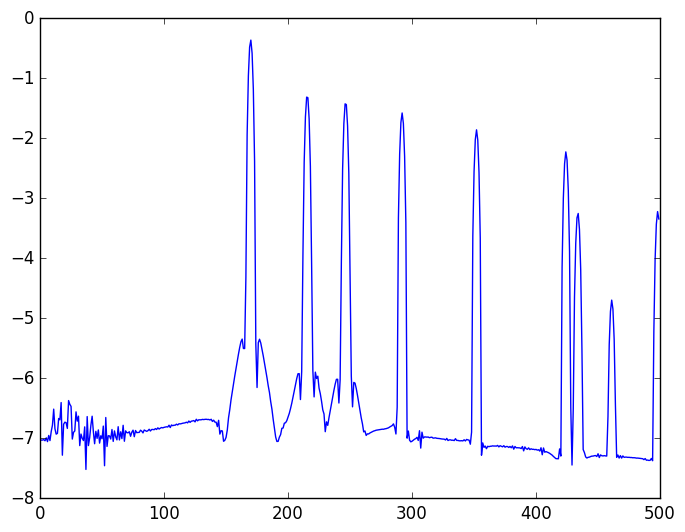

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9ce3c90a10>

In [76]:
plot(log10(abs(fft(om.*out))[1:500]))